# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

# Bussiness and data understanding

In [2]:
# load companies data file
companies=pd.read_csv('companies.txt',sep="\t",encoding='iso-8859-1')  # hit and trail

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


# Checking info of companies data frame

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


#  Checking null values of companies dataframe

In [5]:
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

# 2nd dataset

In [6]:
# load rounds2 data file
rounds2=pd.read_csv('rounds2.csv',encoding='iso-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


# Checking info of rounds2 dataframe

In [7]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


# Checking null values of rounds2 dataframe

In [8]:
rounds2.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

# dropping columns (unnecessary) from both data frames

In [9]:
companies.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [10]:
rounds2.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

In [11]:
cols1=["homepage_url","status","state_code","region","city","founded_at"]
cols2=['funding_round_permalink','funded_at','funding_round_code']
rounds2.drop(cols2,axis=1,inplace=True)

In [12]:
companies.drop(cols1,axis=1,inplace=True)

In [13]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/ORGANIZATION/-QOUNTER,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [14]:
companies.head()

,permalink,name,category_list,country_code
0,/Organization/-Fame,#fame,Media,IND
1,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/Organization/0-6-Com,0-6.com,Curated Web,CHN
4,/Organization/004-Technologies,004 Technologies,Software,USA


#### How many unique companies are present in companies file?

In [15]:
#convert the data of permalink column into lower case for checking the unique companies in companies dataframe
companies['permalink']=companies['permalink'].str.lower()

In [16]:
companies.head()

,permalink,name,category_list,country_code
0,/organization/-fame,#fame,Media,IND
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN
3,/organization/0-6-com,0-6.com,Curated Web,CHN
4,/organization/004-technologies,004 Technologies,Software,USA


In [17]:
#check unique companies
companies['permalink'].nunique()

66368

#### How many unique companies are present in rounds2?

In [18]:
#convert the company permalink data into lower case for checking the unique companies in rounds2 
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()

In [19]:
rounds2.head()

,company_permalink,funding_round_type,raised_amount_usd
0,/organization/-fame,venture,10000000.0
1,/organization/-qounter,venture,NaN
2,/organization/-qounter,seed,700000.0
3,/organization/-the-one-of-them-inc-,venture,3406878.0
4,/organization/0-6-com,venture,2000000.0


In [20]:
#check unique companies
rounds2['company_permalink'].nunique()

66370

#### Merge the two data frames so that all  variables (columns)  in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame ?

In [21]:
#merging of two data frames
rounds2.rename(columns={'company_permalink':'permalink'},inplace=True)
master_frame=pd.merge(companies,rounds2,how="inner",on="permalink")
master_frame.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0


In [22]:
#check the master_frame info
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114942 non-null  object 
 1   name                114941 non-null  object 
 2   category_list       111535 non-null  object 
 3   country_code        106271 non-null  object 
 4   funding_round_type  114942 non-null  object 
 5   raised_amount_usd   94958 non-null   float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


# Checking null values of master_frame

In [23]:
master_frame.isnull().sum()

permalink                 0
name                      1
category_list          3407
country_code           8671
funding_round_type        0
raised_amount_usd     19984
dtype: int64

# Checking percentage of null values

In [24]:
round((100*master_frame.isnull().sum())/len(master_frame),2)

permalink              0.00
name                   0.00
category_list          2.96
country_code           7.54
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

In [25]:
master_frame2=master_frame[master_frame.isnull().sum(axis=1)<2]

In [26]:
master_frame2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,venture,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,NaN,venture,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0


In [27]:
round((100*master_frame2.isnull().sum())/len(master_frame),2)

permalink              0.00
name                   0.00
category_list          0.50
country_code           4.68
funding_round_type     0.00
raised_amount_usd     13.92
dtype: float64

In [28]:
master_frame2.dropna(inplace=True)

In [29]:
round((100*master_frame2.isnull().sum())/len(master_frame),2)

permalink             0.0
name                  0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [30]:
master_frame2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
6,/organization/01games-technology,01Games Technology,Games,HKG,undisclosed,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0


# Investment Type Analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make.

1. Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity)

As mentioned above we have to extract data where funding_round_type is venture, angel, seed, and private equity

In [31]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [32]:
funding_lst=['seed','angel','venture','private_equity']
master_frame2=master_frame2[master_frame2['funding_round_type'].isin(funding_lst)]

In [33]:
master_frame2['funding_round_type'].unique()

array(['venture', 'seed', 'private_equity', 'angel'], dtype=object)

In [34]:
master_frame2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0


In [35]:
master_frame2.reset_index(drop=True,inplace=True)

In [36]:
master_frame2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,seed,43360.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0


In [37]:
#grouping of master_frame 

In [38]:
a=master_frame2.groupby("funding_round_type")["raised_amount_usd"].mean().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x))

In [39]:
a

funding_round_type
private_equity    73938486.3
venture           11724222.7
angel               971573.9
seed                747827.9
Name: raised_amount_usd, dtype: object

#### Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [40]:
# venture is the most funding amount b/w 5m to 15 million

# filtering the rows which contains venture investment type

In [41]:
master_frame3=master_frame2[master_frame2['funding_round_type']=='venture']

In [42]:
master_frame3.reset_index(drop=True,inplace=True)

In [43]:
master_frame3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/0-6-com,0-6.com,Curated Web,CHN,venture,2000000.0
2,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,CAN,venture,719491.0
3,/organization/0xdata,H2O.ai,Analytics,USA,venture,20000000.0
4,/organization/0xdata,H2O.ai,Analytics,USA,venture,1700000.0


# Country analysis

#### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type

1. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in.
2. Consider a country to be English speaking only if English is one of the official languages in that country

So First i am going to extract only those countries where official languages is english

fetch the list of english- speaking countries from the given link i.e.
https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language

In [44]:
#fetching data from the 
country_lst=pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')

In [45]:
type(country_lst)

list

In [46]:
len(country_lst)

20

In [47]:
#fetch 1st two data frames to get the official language of countries
s1=country_lst[0]['ISO code']
s1.head()

0    ATG
1    BHS
2    BRB
3    BLZ
4    BWA
Name: ISO code, dtype: object

In [48]:
s2=country_lst[1]['ISO code']
s2.head()

0    AUS
1    NZL
2    GBR
3    USA
Name: ISO code, dtype: object

In [49]:
s3=pd.concat([s2,s1],axis=0,ignore_index=True)
s3.head()

0    AUS
1    NZL
2    GBR
3    USA
4    ATG
Name: ISO code, dtype: object

In [50]:
country_df=pd.DataFrame()
country_df['country_code']=s3

In [51]:
country_df.head()

,country_code
0,AUS
1,NZL
2,GBR
3,USA
4,ATG


In [52]:
#merge both datasets i.e. master_frame3 and country_df to get countries whose official language is ENGLISH
master_frame4=pd.merge(master_frame3,country_df,on="country_code",how='inner')

In [53]:
master_frame4['country_code'].unique()

array(['IND', 'CAN', 'USA', 'GBR', 'IRL', 'SGP', 'AUS', 'NZL', 'PHL',
       'ZAF', 'KEN', 'CMR', 'NGA', 'PAK', 'MUS', 'TTO', 'KNA', 'MLT',
       'GHA', 'UGA', 'BWA'], dtype=object)

#### Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [54]:
english_df=master_frame4.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [55]:
english_df

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0
9,NGA,183440000.0


#### For the chosen investment type, make a data frame named top_9 with the top nine countries (based on the total investment amount each country has received)

In [56]:
top_9=english_df.head(9)

In [57]:
top_9

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0
3,CAN,9482217668.0
4,SGP,2793917856.0
5,IRL,1669285543.0
6,AUS,1319028698.0
7,NZL,448316383.0
8,ZAF,233713106.0


#### top three English-speaking countries in the data frame top_9.

In [58]:
top_9.head(3)

,country_code,raised_amount_usd
0,USA,420068029342.0
1,GBR,20072813004.0
2,IND,14261508718.0


# Sector Analysis1

Now we also know the three most investment-friendly countries and the most suited funding type for Spark Funds. Let us now focus on finding the best sectors in these countries.

In [59]:
#Extract top 3 countries from the master frame to find the best sectors in these countries
top_3_lst=list(top_9['country_code'][:3])
top_3_lst

['USA', 'GBR', 'IND']

In [60]:
master_frame5=master_frame4[master_frame4['country_code'].isin(top_3_lst)]

In [61]:
master_frame5['country_code'].unique()

array(['IND', 'USA', 'GBR'], dtype=object)

In [62]:
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D|Mobile,IND,venture,825000.0


In [63]:
type(master_frame5['category_list'][0])

str

You discuss with the CEO and come up with the business rule that the first string before the vertical bar will be considered the primary sector. In the example above, ‘Application Platforms’ will be considered the primary sector.

In [64]:

master_frame5['category_list']=master_frame5['category_list'].apply(lambda x:x.split('|')[0])
master_frame5.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D,IND,venture,825000.0


# another data set

In [99]:
mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [67]:
mapping.shape

(688, 10)

In [68]:
mapping['category_list'].unique()

array([nan, '3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'B

In [69]:
mapping['category_list']=mapping['category_list'].str.replace('0','na')

In [ ]:
#using melt function to reshape the data so that each category_list is mapped to its main sector

In [74]:
melt_df=pd.melt(mapping,id_vars='category_list',var_name='main_sector')
melt_df2=melt_df[melt_df['value']==1]

In [76]:
melt_df2.reset_index(drop=True,inplace=True)

In [77]:
melt_df2.drop('value',axis=1,inplace=True)

In [78]:
melt_df2

,category_list,main_sector
0,Adventure Travel,Automotive & Sports
1,Aerospace,Automotive & Sports
2,Auto,Automotive & Sports
3,Automated Kiosk,Automotive & Sports
4,Automotive,Automotive & Sports
...,...,...
683,Social Recruiting,"Social, Finance, Analytics, Advertising"
684,Social Television,"Social, Finance, Analytics, Advertising"
685,Social Travel,"Social, Finance, Analytics, Advertising"
686,Stock Exchanges,"Social, Finance, Analytics, Advertising"


In [79]:
master_frame5

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,#fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,24x7 Learning,EdTech,IND,venture,4000000.0
3,/organization/3dsoc,3DSoC,3D,IND,venture,1240000.0
4,/organization/3dsoc,3DSoC,3D,IND,venture,825000.0
...,...,...,...,...,...,...
40044,/organization/zubka,Zubka,Consulting,GBR,venture,3919186.0
40045,/organization/zutux,Zutux,E-Commerce,GBR,venture,1503926.0
40046,/organization/zyncd,Zyncd,Crowdsourcing,GBR,venture,144451.0
40047,/organization/zynstra,Zynstra,Software,GBR,venture,8400000.0


#### Code for a merged data frame with each primary sector mapped to its main sector (the primary sector should be present in a separate column).

In [80]:
master_frame6=pd.merge(master_frame5,melt_df2,on='category_list')

In [81]:
master_frame6

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
4,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
...,...,...,...,...,...,...,...
38633,/organization/smarkets,Smarkets,Financial Exchanges,GBR,venture,2300000.0,"Social, Finance, Analytics, Advertising"
38634,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,1300000.0,Cleantech / Semiconductors
38635,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,4570000.0,Cleantech / Semiconductors
38636,/organization/stingray-geophysical,Stingray Geophysical,Gas,GBR,venture,11460000.0,Cleantech / Semiconductors


#  Sector analysis 2

Now, the aim is to find out the most heavily invested main sectors in each of the three countries (for funding type FT and investments range of 5-15 M USD).

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range

In [82]:
D1=master_frame6[master_frame6['country_code']==top_3_lst[0]]
D2=master_frame6[master_frame6['country_code']==top_3_lst[1]]
D3=master_frame6[master_frame6['country_code']==top_3_lst[2]]

In [83]:
D1.reset_index(drop=True,inplace=True)
D2.reset_index(drop=True,inplace=True)
D3.reset_index(drop=True,inplace=True)

In [84]:
D1.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/all-def-digital,All Def Digital,Media,USA,venture,5000000.0,Entertainment
1,/organization/audiosocket,Audiosocket,Media,USA,venture,650000.0,Entertainment
2,/organization/audiosocket,Audiosocket,Media,USA,venture,750000.0,Entertainment
3,/organization/audiosocket,Audiosocket,Media,USA,venture,1582300.0,Entertainment
4,/organization/babble,Babble,Media,USA,venture,2000000.0,Entertainment


In [85]:
D2.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/90min,90min,Media,GBR,venture,15000000.0,Entertainment
1,/organization/90min,90min,Media,GBR,venture,5800000.0,Entertainment
2,/organization/90min,90min,Media,GBR,venture,18000000.0,Entertainment
3,/organization/teepix,Teepix,Media,GBR,venture,1655405.0,Entertainment
4,/organization/31dover,31Dover,E-Commerce,GBR,venture,2274716.0,Others


In [86]:
D3.head()

,permalink,name,category_list,country_code,funding_round_type,raised_amount_usd,main_sector
0,/organization/-fame,#fame,Media,IND,venture,10000000.0,Entertainment
1,/organization/manas-informatics,Manas Informatic,Media,IND,venture,160000.0,Entertainment
2,/organization/21diamonds-india,21Diamonds,E-Commerce,IND,venture,6369507.0,Others
3,/organization/agrostar,Agrostar,E-Commerce,IND,venture,4000000.0,Others
4,/organization/au-financiers,Au FINANCIERS,E-Commerce,IND,venture,21000000.0,Others


# The total number (or count) of investments for each main sector in a separate column
 

In [87]:
# USA
abc1_1=D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()


In [100]:
abc1_1

,main_sector,raised_amount_usd
0,Others,8310
1,Cleantech / Semiconductors,7857
2,"Social, Finance, Analytics, Advertising",7246
3,"News, Search and Messaging",4350
4,Health,3269
5,Manufacturing,2453
6,Entertainment,1794
7,Automotive & Sports,505


In [88]:
# GBR
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,516
1,Cleantech / Semiconductors,437
2,"Social, Finance, Analytics, Advertising",421
3,"News, Search and Messaging",241
4,Entertainment,136
5,Manufacturing,122
6,Health,118
7,Automotive & Sports,44


In [89]:
# IND
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).to_frame().reset_index()

,main_sector,raised_amount_usd
0,Others,284
1,"Social, Finance, Analytics, Advertising",147
2,"News, Search and Messaging",130
3,Entertainment,76
4,Manufacturing,55
5,Cleantech / Semiconductors,54
6,Health,42
7,Automotive & Sports,31


#  The total amount invested in each main sector in a separate column


In [90]:
# USA
abc1=D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [101]:
abc1

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,118834869645.0
1,"Social, Finance, Analytics, Advertising",86331402349.0
2,Others,82796823598.0
3,"News, Search and Messaging",45439636584.0
4,Health,31675057766.0
5,Manufacturing,24845319470.0
6,Entertainment,17014560960.0
7,Automotive & Sports,11632164696.0


In [91]:
# GBR
abc2=D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [92]:
abc2

,main_sector,raised_amount_usd
0,Cleantech / Semiconductors,5052849729.0
1,Others,4492219646.0
2,"Social, Finance, Analytics, Advertising",3773328672.0
3,"News, Search and Messaging",2956023749.0
4,Entertainment,1162564878.0
5,Health,1046654806.0
6,Manufacturing,1019283214.0
7,Automotive & Sports,480878712.0


In [93]:
# IND
abc3=D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False).apply(lambda x:'{:.1f}'.format(x)).to_frame().reset_index()

In [102]:
abc3

,main_sector,raised_amount_usd
0,Others,6329507440.0
1,"News, Search and Messaging",1739579948.0
2,"Social, Finance, Analytics, Advertising",1578804920.0
3,Automotive & Sports,1556350000.0
4,Entertainment,976191777.0
5,Cleantech / Semiconductors,786444633.0
6,Manufacturing,730260000.0
7,Health,564370000.0


In [95]:
data1=abc1.head(3)
data2=abc2.head(3)
data3=abc3.head(3)

In [96]:
english_df=english_df.head(10)


# Visualizations

In [109]:
#extract funding type from the master frame and group data for visualizations
funding_type = ['private_equity','seed','venture']
master_frame=master_frame[master_frame['funding_round_type'].isin(funding_type)]
master_group_plot=master_frame.groupby(by='funding_round_type')
df_plot1 = pd.DataFrame(master_group_plot['raised_amount_usd'].sum())
#master_group_plot_2=master_frame.groupby(by='funding_round_type')
df_plot2=pd.DataFrame(master_group_plot['raised_amount_usd'].mean())

fraction_df = pd.DataFrame(round(100*(df_plot1['raised_amount_usd'])/sum(df_plot1['raised_amount_usd']),2))
fraction_df.reset_index()

,funding_round_type,raised_amount_usd
0,private_equity,18.95
1,seed,2.27
2,venture,78.78


### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type.

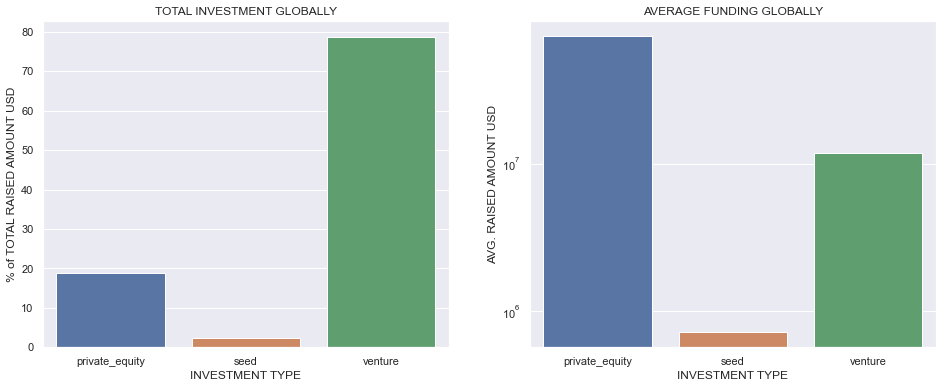

In [110]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.barplot(x=fraction_df.index,y='raised_amount_usd',data=fraction_df,ci=None)
ax.set(xlabel='INVESTMENT TYPE', ylabel='% of TOTAL RAISED AMOUNT USD',title='TOTAL INVESTMENT GLOBALLY')
#plt.yscale('log')
plt.subplot(1, 2, 2)
ax = sb.barplot(x=df_plot2.index,y='raised_amount_usd',data=df_plot2,ci=None,)
ax.set(xlabel='INVESTMENT TYPE', ylabel='AVG. RAISED AMOUNT USD',title='AVERAGE FUNDING GLOBALLY')
plt.yscale('log')
plt.show()

### A plot showing the top 9 countries against the total amount of investments of funding type FT.

In [115]:
d1=english_df['raised_amount_usd'].apply(lambda x:x.split('.')[0])
d1_int=[]
for i in d1:
    d1_int.append(int(i))
english_df["val"]=d1_int

<Figure size 720x1152 with 0 Axes>

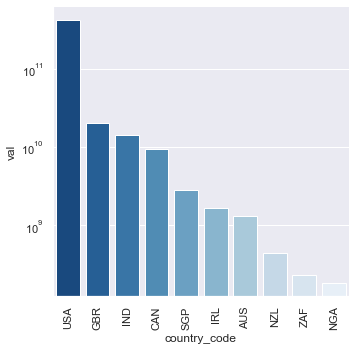

In [123]:
plt.figure(figsize=(10,16))

sb.catplot(x='country_code',y='val',data=english_df,kind='bar',palette='Blues_r',)
plt.xticks(rotation=90)

plt.yscale('log')
plt.show()

### A plot showing the number of investments in the top 3 sectors of the top 3 countries

In [113]:
v=data1['raised_amount_usd'].apply(lambda x:x.split('.')[0])
v_int=[]
for i in v:
    v_int.append(int(i))
    
v2=data2['raised_amount_usd'].apply(lambda x:x.split('.')[0])
v_int2=[]
for i in v2:
    v_int2.append(int(i))
    
v3=data3['raised_amount_usd'].apply(lambda x:x.split('.')[0])
v_int3=[]
for i in v3:
    v_int3.append(int(i))

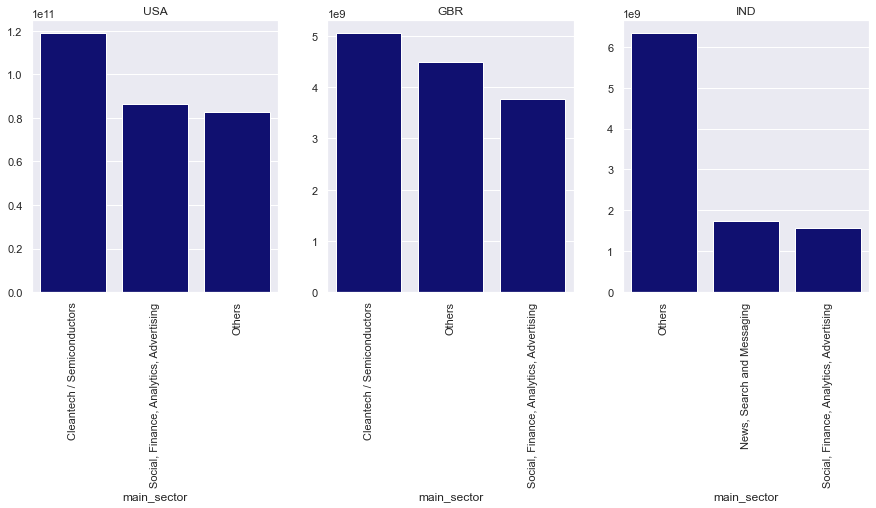

In [114]:
plt.figure(figsize=(15,5))
plt.subplot(131)
sb.barplot(data1["main_sector"],y=v_int,color="navy")
plt.title("USA")
plt.xticks(rotation=90)

plt.subplot(132)
sb.barplot(data2["main_sector"],y=v_int2,color="navy")
plt.title("GBR")
plt.xticks(rotation=90)



plt.subplot(133)
sb.barplot(data3["main_sector"],y=v_int3,color="navy")
plt.title("IND")
plt.xticks(rotation=90)
plt.show()